In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib import font_manager,rc  #한글 폰트 입력을 위한 라이브러리

#폰트 경로 가져오기
font_path = 'C:\\Windows\\Fonts\\SGL.ttf' #삼성고딕체
 
# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()
 
#폰트 설정하기
mpl.rc('font',family=font_name)

In [2]:
workdir = ""
file_path = '{}/NUM_DATA.dta'.format(workdir)

data = pd.read_stata(file_path)

# data = pd.merge(data1,data2, on=['ID','ORDR_YMD'], how="left")

# 조건별 그룹 설정

### 정상, 기타 결과 그룹 분리

In [3]:
GRP = 'BMI'

In [4]:
# data.loc[(data['BL3113'] >= 240) | (data['BL314201'] >= 160 ) | (data['BL3141'] >= 200 ) | (data['BL3142'] < 40 ) | (data['TRT_MED_HYPERLIPIDEMIA'] == '1'), GRP] = '이상지질혈증'
# # data.loc[(data['BL3164'] >= 6.5) | (data['TRT_MED_DIABETES'] == '1'), GRP] = '당뇨'
# data['DYSLIPID'].fillna('정상',inplace=True)

In [5]:
data.loc[data['GEND_CD'] == 'M', 'GENDER'] = '남'
data.loc[data['GEND_CD'] == 'F', 'GENDER'] = '여'

In [6]:
data.loc[ data['AGE'] < 30                      ,'AGEGRP'] = '0~29세'
data.loc[(data['AGE'] > 29) & (data['AGE'] < 40),'AGEGRP'] = '30~39세'
data.loc[(data['AGE'] > 39) & (data['AGE'] < 50),'AGEGRP'] = '40~49세'
data.loc[(data['AGE'] > 49) & (data['AGE'] < 60),'AGEGRP'] = '50~59세'
data.loc[(data['AGE'] > 59) & (data['AGE'] < 70),'AGEGRP'] = '60~69세'
data.loc[ data['AGE'] > 69                      ,'AGEGRP'] = '70세 이상'
# data.head(100)

In [7]:
data.loc[ data['SM316001'] < 18.5                            ,'BMI'] = '01. 저체중'
data.loc[(data['SM316001'] >= 18.5) & (data['SM316001'] < 23),'BMI'] = '02. 정상체중'
data.loc[(data['SM316001'] >= 23.0) & (data['SM316001'] < 25),'BMI'] = '03. 위험체중'
data.loc[(data['SM316001'] >= 25.0) & (data['SM316001'] < 30),'BMI'] = '04. 비만1단계'
data.loc[(data['SM316001'] >= 30.0) & (data['SM316001'] < 40),'BMI'] = '05. 비만2단계'
data.loc[ data['SM316001'] >= 40.0                           ,'BMI'] = '06. 비만3단계'

# data

### 특정 그룹 별도 저장 - 비만도는 control군 배제

In [8]:
# obd_ctrl = data.drop(data.loc[data[GRP]!='당뇨'].index)
# obd_ctrl.loc[(obd_ctrl['BL3164'] < 7.0), '{}_CTRL_YN'.format(GRP)] = '조절군'
# obd_ctrl['{}_CTRL_YN'.format(GRP)].fillna('비조절군',inplace=True)
# obd_ctrl

In [9]:
data_m = data.drop(data.loc[data['GEND_CD']=='F'].index)
data_f = data.drop(data.loc[data['GEND_CD']=='M'].index)

In [10]:
# data_ctrl_m = obd_ctrl.drop(obd_ctrl.loc[obd_ctrl['GEND_CD']=='F'].index)
# data_ctrl_f = obd_ctrl.drop(obd_ctrl.loc[obd_ctrl['GEND_CD']=='M'].index)

## pivot table create

In [11]:
obd_cnt_m = data_m.pivot_table(
                             index=[GRP,'GENDER']
                            ,columns=['AGEGRP']
    ,values=['ID']
    ,aggfunc='count'
    ,margins=True
    ,fill_value=0
                            )

# obd_cnt_m
# obd_per_m = round(obd_cnt_m.div(obd_cnt_m.iloc[-1,-1], axis=0).astype(float)*100,1) # total value
# each column total value percentile
obd_per_m = round(obd_cnt_m.div(obd_cnt_m.iloc[-1], axis=1).astype(float)*100,1)

# obd_per_m

obd_agegrp_m = pd.DataFrame()

for i in range(len(obd_cnt_m.columns)):
    if i == 0:
        obd_agegrp_m = pd.concat(
                                [
                                 obd_cnt_m.iloc[:,i]
                                ,obd_per_m.iloc[:,i]
                                ]
                            ,axis=1
        )
    else:
        obd_agegrp_m = pd.concat(
                                [
                                 obd_agegrp_m
                                ,obd_cnt_m.iloc[:,i]
                                ,obd_per_m.iloc[:,i]
                                ]
                            ,axis=1
        )
        
# obd_agegrp_m

In [12]:
obd_cnt_f = data_f.pivot_table(
                             index=[GRP,'GENDER']
                            ,columns=['AGEGRP']
    ,values=['ID']
    ,aggfunc='count'
    ,margins=True
    ,fill_value=0
                            )

# obd_cnt_f
# obd_per_f = round(obd_cnt_f.div(obd_cnt_f.iloc[-1,-1], axis=0).astype(float)*100,1) # total value
# each column total value percentile
obd_per_f = round(obd_cnt_f.div(obd_cnt_f.iloc[-1], axis=1).astype(float)*100,1)

# obd_per_f

obd_agegrp_f = pd.DataFrame()

for i in range(len(obd_cnt_f.columns)):
    if i == 0:
        obd_agegrp_f = pd.concat(
                                [
                                 obd_cnt_f.iloc[:,i]
                                ,obd_per_f.iloc[:,i]
                                ]
                            ,axis=1
        )
    else:
        obd_agegrp_f = pd.concat(
                                [
                                 obd_agegrp_f
                                ,obd_cnt_f.iloc[:,i]
                                ,obd_per_f.iloc[:,i]
                                ]
                            ,axis=1
        )
        
# obd_agegrp_f

In [13]:
obd_agegrp = pd.concat([obd_agegrp_m.iloc[:-1,:], obd_agegrp_f.iloc[:-1,:]],axis=0)
# obd_agegrp = pd.concat([obd_agegrp_m, obd_agegrp_f],axis=0)
obd_agegrp_label = []

for i in range(len(obd_agegrp.columns)):
    obd_agegrp_label.append(obd_agegrp.columns[i][1])
    
obd_agegrp.columns = obd_agegrp_label
# obd_agegrp.set_index(obd_agegrp.index.names,inplace=True)
obd_agegrp = obd_agegrp.sort_index()

labels = []
for i in range(len(obd_per_m.columns)-1):
    labels.append(obd_per_m.columns[i][1])
    
# obd_agegrp

In [14]:
obd_cnt_t = data.pivot_table(
                             index=[GRP]#,'GENDER']
                            ,columns=['AGEGRP']
    ,values=['ID']
    ,aggfunc='count'
    ,margins=True
    ,fill_value=0
                            )

# total value percentile
obd_per_t = round(obd_cnt_t.div(obd_cnt_t.iloc[-1,-1], axis=0).astype(float)*100,1)

obd_per_t

obd_agegrp_t = pd.DataFrame()

for i in range(len(obd_cnt_t.columns)):
    if i == 0:
        obd_agegrp_t = pd.concat(
                                [
                                 obd_cnt_t.iloc[:,i]
                                ,obd_per_t.iloc[:,i]
                                ]
                            ,axis=1
        )
    else:
        obd_agegrp_t = pd.concat(
                                [
                                 obd_agegrp_t
                                ,obd_cnt_t.iloc[:,i]
                                ,obd_per_t.iloc[:,i]
                                ]
                            ,axis=1
        )

# obd_agegrp_t

# Stacked Barchart create

C:\Users\smcljy\AppData\Local\Temp/ipykernel_2600/3788921946.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


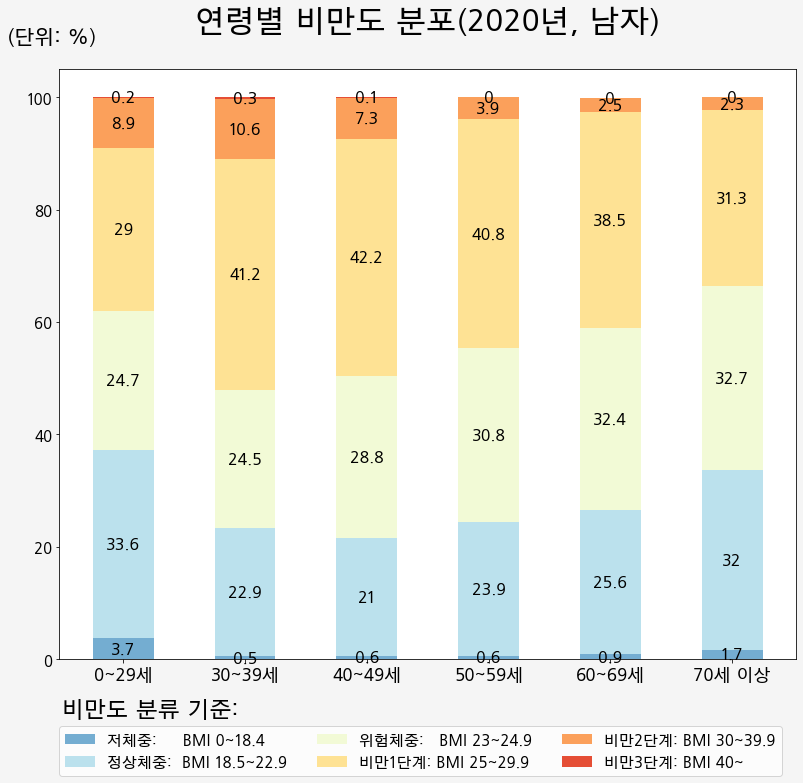

In [15]:
value01 = obd_per_m.iloc[0,:-1].to_list()
value02 = obd_per_m.iloc[1,:-1].to_list()
value03 = obd_per_m.iloc[2,:-1].to_list()
value04 = obd_per_m.iloc[3,:-1].to_list()
value05 = obd_per_m.iloc[4,:-1].to_list()
value06 = obd_per_m.iloc[5,:-1].to_list()

width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(12, 11),linewidth=2) # 캔버스 배경 사이즈 설정
fig.set_facecolor('whitesmoke') ## 캔버스 배경색 설정

rects1 = ax.bar(labels, value01, width, label='저체중:     BMI 0~18.4'
                  ,color=plt.get_cmap('RdYlBu')(np.linspace(0.15, 0.8,np.array(labels).shape[0]))[5])
rects2 = ax.bar(labels, value02, width, label='정상체중:  BMI 18.5~22.9'
                  ,bottom=value01
                  ,color=plt.get_cmap('RdYlBu')(np.linspace(0.15, 0.8,np.array(labels).shape[0]))[4])
rects3 = ax.bar(labels, value03, width, label='위험체중:   BMI 23~24.9'
                  ,bottom=[value01[i]+value02[i] for i in range(len(value01))]
                  ,color=plt.get_cmap('RdYlBu')(np.linspace(0.15, 0.8,np.array(labels).shape[0]))[3])
rects4 = ax.bar(labels, value04, width, label='비만1단계: BMI 25~29.9'
                  ,bottom=[value01[i]+value02[i]+value03[i] for i in range(len(value01))]
                  ,color=plt.get_cmap('RdYlBu')(np.linspace(0.15, 0.8,np.array(labels).shape[0]))[2])
rects5 = ax.bar(labels, value05, width, label='비만2단계: BMI 30~39.9'
                  ,bottom=[value01[i]+value02[i]+value03[i]+value04[i] for i in range(len(value01))]
                  ,color=plt.get_cmap('RdYlBu')(np.linspace(0.15, 0.8,np.array(labels).shape[0]))[1])
rects6 = ax.bar(labels, value06, width, label='비만3단계: BMI 40~'
                  ,bottom=[value01[i]+value02[i]+value03[i]+value04[i]+value05[i] for i in range(len(value01))]
                  ,color=plt.get_cmap('RdYlBu')(np.linspace(0.15, 0.8,np.array(labels).shape[0]))[0])

ax.set_title('연령별 비만도 분포(2020년, 남자)\n',fontsize=30)
ax.set_ylabel(
                '(단위: %)\n' # 표시값
                 ,labelpad=-70 # 여백값 설정
                ,fontsize=20 # 글씨크기 설정
                ,rotation=0 # 회전값 조정
#                 ,ha='center' # 위치조정
                ,loc='top' # 위치조정, ha와 동시에 사용은 불가함.
            )
ax.yaxis.set_tick_params(labelsize=15) # y축 표시값 글씨크기 조정

ax.set_xticklabels(
                   labels
                  , fontsize=17
                  )

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(rects1, label_type='center',fontsize=16)
ax.bar_label(rects2, label_type='center',fontsize=16)
ax.bar_label(rects3, label_type='center',fontsize=16)
ax.bar_label(rects4, label_type='center',fontsize=16)
ax.bar_label(rects5, label_type='center',fontsize=16)
ax.bar_label(rects6, label_type='center',fontsize=16)

plt.text(-0.5, -10,  '비만도 분류 기준:', fontsize=22)
lg = ax.legend(bbox_to_anchor=(-0.01,-0.21)
          ,ncol=3  ,loc='lower left' ,fontsize=15
          )

fig.tight_layout()

plt.savefig("{}/02_04비만도_01남자분포.png".format(workdir[:-5])
            ,edgecolor='black', dpi=144 #72의 배수
            ,bbox_extra_artists=(lg,)
            ,bbox_inches='tight'
            )

plt.show()

C:\Users\smcljy\AppData\Local\Temp/ipykernel_2600/3975794688.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


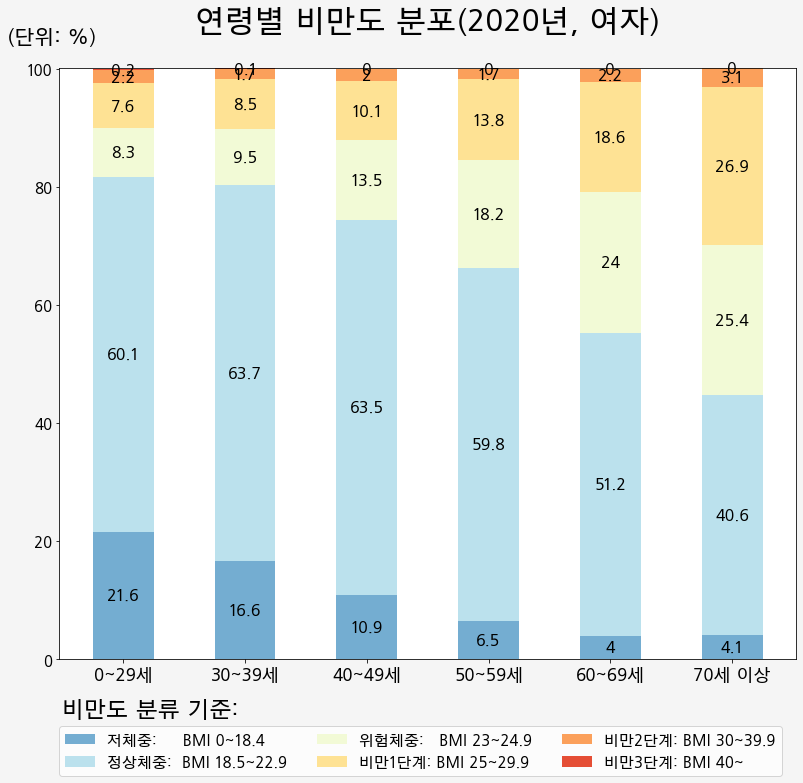

In [16]:
value01 = obd_per_f.iloc[0,:-1].to_list()
value02 = obd_per_f.iloc[1,:-1].to_list()
value03 = obd_per_f.iloc[2,:-1].to_list()
value04 = obd_per_f.iloc[3,:-1].to_list()
value05 = obd_per_f.iloc[4,:-1].to_list()
value06 = obd_per_f.iloc[5,:-1].to_list()

width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(12, 11),linewidth=2) # 캔버스 배경 사이즈 설정
fig.set_facecolor('whitesmoke') ## 캔버스 배경색 설정

rects1 = ax.bar(labels, value01, width, label='저체중:     BMI 0~18.4'
                  ,color=plt.get_cmap('RdYlBu')(np.linspace(0.15, 0.8,np.array(labels).shape[0]))[5])
rects2 = ax.bar(labels, value02, width, label='정상체중:  BMI 18.5~22.9'
                  ,bottom=value01
                  ,color=plt.get_cmap('RdYlBu')(np.linspace(0.15, 0.8,np.array(labels).shape[0]))[4])
rects3 = ax.bar(labels, value03, width, label='위험체중:   BMI 23~24.9'
                  ,bottom=[value01[i]+value02[i] for i in range(len(value01))]
                  ,color=plt.get_cmap('RdYlBu')(np.linspace(0.15, 0.8,np.array(labels).shape[0]))[3])
rects4 = ax.bar(labels, value04, width, label='비만1단계: BMI 25~29.9'
                  ,bottom=[value01[i]+value02[i]+value03[i] for i in range(len(value01))]
                  ,color=plt.get_cmap('RdYlBu')(np.linspace(0.15, 0.8,np.array(labels).shape[0]))[2])
rects5 = ax.bar(labels, value05, width, label='비만2단계: BMI 30~39.9'
                  ,bottom=[value01[i]+value02[i]+value03[i]+value04[i] for i in range(len(value01))]
                  ,color=plt.get_cmap('RdYlBu')(np.linspace(0.15, 0.8,np.array(labels).shape[0]))[1])
rects6 = ax.bar(labels, value06, width, label='비만3단계: BMI 40~'
                  ,bottom=[value01[i]+value02[i]+value03[i]+value04[i]+value05[i] for i in range(len(value01))]
                  ,color=plt.get_cmap('RdYlBu')(np.linspace(0.15, 0.8,np.array(labels).shape[0]))[0])

ax.set_title('연령별 비만도 분포(2020년, 여자)\n',fontsize=30)
ax.set_ylabel(
                '(단위: %)\n' # 표시값
                 ,labelpad=-70 # 여백값 설정
                ,fontsize=20 # 글씨크기 설정
                ,rotation=0 # 회전값 조정
#                 ,ha='center' # 위치조정
                ,loc='top' # 위치조정, ha와 동시에 사용은 불가함.
            )
ax.yaxis.set_tick_params(labelsize=15) # y축 표시값 글씨크기 조정

ax.set_xticklabels(
                   labels
                  , fontsize=17
                  )

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(rects1, label_type='center',fontsize=16)
ax.bar_label(rects2, label_type='center',fontsize=16)
ax.bar_label(rects3, label_type='center',fontsize=16)
ax.bar_label(rects4, label_type='center',fontsize=16)
ax.bar_label(rects5, label_type='center',fontsize=16)
ax.bar_label(rects6, label_type='center',fontsize=16)

plt.text(-0.5, -9.5,  '비만도 분류 기준:', fontsize=22)
lg = ax.legend(bbox_to_anchor=(-0.01,-0.21)
          ,ncol=3  ,loc='lower left' ,fontsize=15
          )

fig.tight_layout()

plt.savefig("{}/02_04비만도_02여자분포.png".format(workdir[:-5])
            ,edgecolor='black', dpi=144 #72의 배수
            ,bbox_extra_artists=(lg,)
            ,bbox_inches='tight'
            )

plt.show()

# data merge, export

In [ ]:
obd_agegrp_t.to_excel('{}/02_04비만도.xlsx'.format(workdir[:-5]),sheet_name="분포")
with pd.ExcelWriter('{}/02_04비만도.xlsx'.format(workdir[:-5]), mode='a',engine='openpyxl') as writer:
    obd_agegrp.to_excel(writer,sheet_name="연령별분포")